# Chromatography: an Introduction
## Learning Objectives
- Relate the separation process to features of the chromatogram, such as retention time and resolution.
- Explain how the interactions between a solute and the stationary phase as well as between a solute and the stationary phase affect retention.
- Predict the elution order for a set of compounds given the mobile phase and the stationary phase.
- Assess molecular properties that may be leveraged for separations.
## Suggested Problems

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('plot.mplstyle')

## A Gas Chromatography (GC) Instrument

![block diagram of gc instrument](./images-chromatography/01_ch27_Fig01.jpg)

**Figure 1.** Block diagram of a typical gas chromatography instrument. Reproduced From Skoog Figure 27-1.

### The Stationary Phase

The most common stationary phase for GC is polydimethylsiloxane (PDMS), which is:
- Non-polar
- Can be modified with phenyl, cyanopropyl, or trifluoropropyl groups to adjust selectivity
- Typically a thin film on the inner wall of a fused silica capillary columns
    -  Typical dimensions: 15-60 meters in length, 0.25-0.32 mm internal diameter
    -  Film thickness typically ranges from 0.1-1.0 μm
    -  Fused silica provides excellent inertness, flexibility, and durability

For general-purpose analyses, a 30 m × 0.25 mm × 0.25 μm PDMS column is often considered the standard "workhorse" configuration in gas chromatography laboratories. These columns offer a good balance of resolution, capacity, and analysis time for many applications.

![Typical capilary column](./images-chromatography/Figure12.24.jpg)

**Figure tk.** Typical example of a capillary column for gas chromatography. This column is 30 m long with an internal di-ameter of 247 µm. The interior surface of the capillary has a 0.25 µm coating of the liquid phase. Reproduced from Figure 12.24 in *Analytical Chemistry 2.1* by David Harvey.

### The Mobile Phase

The mobile phase in gas chromatography is often called the carrier gas. The most common carrier gas for GC is helium, because:
- Good balance between efficiency and speed
- Inert (doesn't react with samples or stationary phase)
- Safe (non-flammable)
- Compatibility with most detectors, especially mass spectrometers
- A typical flow rate for a capillary column is $~1 \, mL \cdot min^{-1}$, but this depends stronlgy on the carrier gas type and the internal diameter of the capillary.

### Detectors
A variety of detectors are used with gas chromatography, which differ based on their sensitivity to different analytes, detection limits, and costs. Here are a couple:
- **Flame ionization detection (FID)** measures the electrical current generated when organic compounds are combusted in a hydrogen-air flame, producing ions proportional to the number of carbon atoms present in the sample. The detector is highly sensitive to hydrocarbons like benzene and toluene while being largely unresponsive to common carrier gases, water, and inorganic compounds, making it an ideal detection method for petroleum product analysis.
- **Thermal conductivity detection (TCD)** measures the difference in thermal conductivity between the carrier gas and the analytes as they elute from the column, using heated filaments whose temperature changes in the presence of compounds with different thermal properties than the carrier gas. Unlike FID, TCD is a universal detector that responds to both organic and inorganic compounds, making it useful for analyzing fixed gases and volatile compounds in petroleum samples, though it offers lower sensitivity than FID for hydrocarbon analysis. This is a very low cost detector, which you may have used in organic chemistry.
- **Mass spectrometry detection*** works by ionizing compounds as they elute from the column using electron impact ionizat, which yields molecular and fragment ions. Analyzing these ions based on their $m$/$z$ yields unique spectral fingerprints. This powerful detection method provides both quantitative measurement and structural identification of compounds.

 

## A Gas Chromatography Seperation
The concentrations of benzene and toluene in petroleum products are strictly regulated due to benzene's carcinogenicity and both compounds' environmental toxicity, making their accurate measurement essential for regulatory compliance and public health protection. 


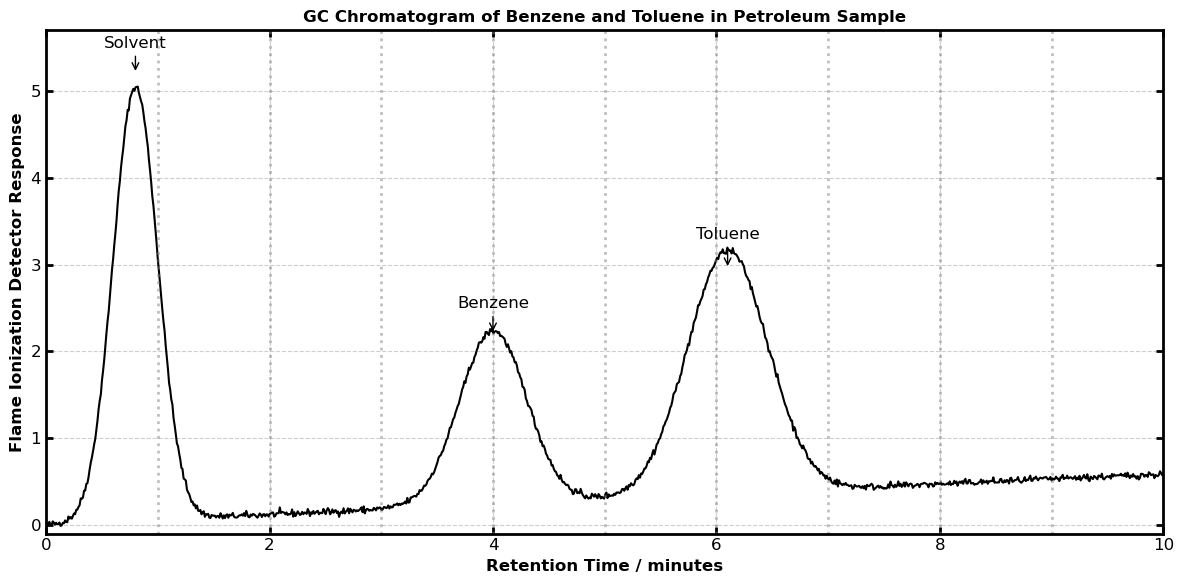

In [9]:
# Time axis (minutes)
time = np.linspace(0, 10, 1000)

# Function to create a peak with tailing
def create_peak(center, height, width):
    # Create a slightly asymmetric peak with tailing
    peak = np.zeros_like(time)
    for i, t in enumerate(time):
        peak[i] = height * np.exp(-0.5 * ((t - center) / width)**2)
    return peak

# Create baseline with some noise
np.random.seed(42)  # For reproducibility
noise_level = 0.02
baseline_drift = 0.1 * np.sin(time / 10) + 0.05 * time  # Slight baseline drift
noise = noise_level * np.random.randn(len(time))
baseline = baseline_drift + noise

# Create solvent peak at the beginning
solvent_peak = create_peak(0.8, 5.0, 0.2)

# # Create smaller impurity peaks
# impurity1 = create_peak(2.5, 0.3, 0.2)
# impurity2 = create_peak(8.2, 0.2, 0.3)

# Create benzene peak at ~4 minutes
benzene_peak = create_peak(4.0, 2.0, 0.3)

# Create toluene peak at ~6 minutes
toluene_peak = create_peak(6.1, 2.8, 0.36)

# Combine all signals
signal = baseline + solvent_peak + benzene_peak + toluene_peak #+ impurity1 + impurity2

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(time, signal, 'k-', linewidth=1.5)

# Add peak labels
plt.annotate('Solvent', xy=(0.8, 5.2), xytext=(0.8, 5.5), ha='center',
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Benzene', xy=(4.0, 2.2), xytext=(4.0, 2.5), ha='center',
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Toluene', xy=(6.1, 2.95), xytext=(6.1, 3.3), ha='center',
             arrowprops=dict(arrowstyle='->'))

# Add labels and title
plt.xlabel('Retention Time / minutes')
plt.ylabel('Flame Ionization Detector Response')
plt.title('GC Chromatogram of Benzene and Toluene in Petroleum Sample')

# Set axis limits to focus on the relevant part
plt.xlim(0, 10)
plt.ylim(-0.1, 5.7)

# Add grid for easier reading
plt.grid(True, linestyle='--', alpha=0.6)

# Add retention time markers
for t in range(1, 10):
    plt.axvline(x=t, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()



**Figure 2.** A sample was colected and diluted with hexane at a 1:100 ratio. The diluted sample was analyzed with gas chromatograph equipped with a flame ionization detector (FID) and a non-polar capillary column (30m × 0.25mm × 0.25μm DB-5 or equivalent). The GC system was programed with an inlet temperature of 250 °C, detector temperature of 300 °C, and an oven program starting at 40 °C (hold 2 minutes), then ramping at 10 °C/min to 120 °C (hold 1 minute), with helium carrier gas at a constant flow of 1.2 mL/min. 1 μL of the diluted sample was injected using a split ratio of 50:1.

### Reflection Question
1. In Figure 2 at 0 minutes, a sample containing analytes A and B are injected into the column. As individuals, list qualitative differences observed as time progresses on Figure 2. As a group, compare your lists and develop a comprehensive list.

## Retention Time and Retention Factor
- The **retention time** ($t_r$) for a solute is the time needed after the mixture is placed on the column until that component emerges from the column. 
- The **retention factor** ($k$) is the ratio of the time a solute spends in the stationary phase to the time spent in the mobile phase. The retention time for an unretained solute is the void time ($t_m$). 

### Reflection Question
2. Based on Figure 2, what are the retention times of analytes A and B?

**Figure tk.** Signal detected at the outflow of the column in Figure 2 during the elution of the sample containing A and B. The first peak represents the time it takes for an unretained substance to pass through the column; it has no interaction with the stationary phase. This figure is an example of a **chromatogram**.

### Reflection Questions
3. On Figure tk, label the peaks corresponding to solute A and solute B. Retention time determination should be consistent from person to person. From the chromatogram, what part of the peak should be used to give the most consistent retention times? 
4. Looking at the chromatogram, determine the void time ($t_m$) for this column.
5. When the solute is in the mobile phase, it is transported down the column at the same speed as the mobile phase. Therefore, the void time is the same for all the solutes in this chromatogram. Why is the void time equal to the time the solutes spend in the mobile phase?
6. If the retention time of a solute is the sum of the time that the solute spends in the mobile phase and in the stationary phase, how could you determine the time the solute spends in only the stationary phase?
7. Write an equation to show how the retention factors for each solute are determined from the chromatogram in Figure 2 and calculate the retention factors for A and B. What are the units of the retention factor?
8. How does the retention time and width influence the quality of the separation between the peaks for A and B?

## Peak-to-Peak Resolution
Peak-to-peak resolution ($R_{pp}$) is used to quantify the separation between two peaks in a chromatogram. Resolution can be calculated by dividing the difference between the retention times for the two peaks by the average of the widths along the baseline (width at base, $w_b$). 
- $R_{pp}$ is a unitless quantity.
- The numerator and the demoninator must have the same units. Choise whatever units are easiest for you as the analyst, this may be time in minutes or distance in milimeters.

### Measuring $w_b$
#### Directly Measuring $w_b$
1. Draw a horizontal line through regions of the chromatogram without signal for analytes. This is the baseline.
2. Draw tangent lines along both sides of the peak, extending them downward to intersect with the baseline.
3. Mark the points where the tangent lines intersect with the baseline. These are your peak width at base boundaries. 
4. Measure the horizontal distance between these two intersection points. This is the $w_b$.
#### Measuring Full Width at Half Max ($FWHM$) and Inferring $w_b$
For a normal distribution:
- $w_b = 4 \cdot \sigma$
- $FWHM = 2 \cdot \sqrt{2 \cdot \ln 2} \cdot \sigma \approx 2.355 \cdot \sigma$
- $ w_b \approx FWHM \cdot \frac{4}{2.355} $

1. Draw a horizontal line through regions of the chromatogram without signal for analytes. This is the baseline.
2. Draw a vertical line that is perpendicular to the baseline and passes through the appex of the peak.
3. Draw a horizontal line that is perpendicular to the vertical line and passes through the midpoint between the baseline and the appex of the peak.
4. Mark the points where that horizontal line intersects the chromatographic peak.
5. Measure the horizontal distance between those two intersection points. This the $FWHM$.

### Reflection Question
9. Calculate the resolution between the peaks for A and B.

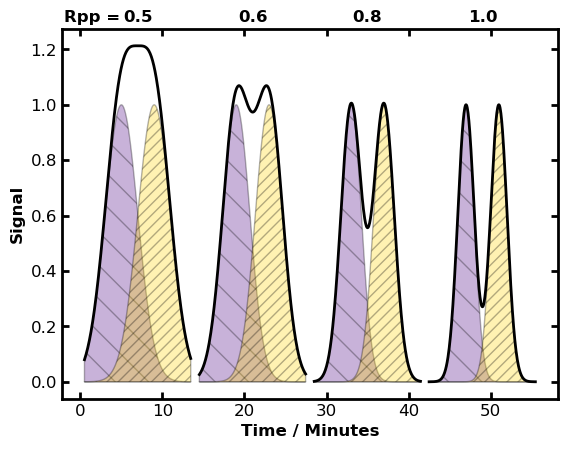

In [3]:
fig, ax = plt.subplots()

offset = 0.
t_A = 5
t_B = 9
Rpp = [0.5, 0.6, 0.8,1.0]

for i in range(4):
    
    s = 1/Rpp[i]
    
    time = np.arange(offset+0.5,offset+13.5,0.05)
    int_A = norm.pdf(time, offset+t_A,scale=s)
    int_A *= 1./int_A.max()
    int_B = norm.pdf(time, offset+t_B,scale=s)
    int_B *= 1./int_B.max()

    ax.fill_between(time,int_A,alpha=0.3,color='indigo',hatch='\\',edgecolor='black')
    ax.fill_between(time,int_B,alpha=0.3,color='gold',hatch='///',edgecolor='black')
    ax.plot(time, int_A+int_B,color="black")
    ax.text(offset+7, 1.3, str(Rpp[i]), fontweight='bold', horizontalalignment="center")
    offset += 14

ax.text(-2, 1.3, "Rpp = ", fontweight='bold')        
ax.set_xlabel('Time / Minutes', fontweight='bold')
ax.set_ylabel('Signal', fontweight='bold')
plt.show()

**Figure 4.** Examples of four pairs of chromatographic peaks that have different $R_{pp}$. Each peak in a given pair has the same area. The black trace is the sum of the signal for both peaks in the pair. 

## Selectivity Factor
The **selectivity factor** ($\alpha$) is a quantitative measure of the relative retention of two solutes. It is defined as the retention factor of the solute with the longer retention time divided by the retention factor of the solute with the shorter retention time.

### Reflection Question
10. Calculate the selectivity factor for solutes A and B. Discuss the relationship been $\alpha$ and $R_{pp}$. Speculate as to how the selection of the stationary and mobility phase may be used to improve the resolution of two components.

## A Microscopic View

**Figure 5.** This is a snapshot of individual solute molecules A (open stars) and B (closed circles) in the vicinity of a solid stationary phase.

### Reflection Question
11. Examine the distribution of solutes A and B between the mobile phase and the stationary phase in Figure tk. The distribution of the solute molecules is similar to a partitioning between the stationary phase and the mobile phase. The distribution constant ($D$) is the ratio of the concentration of the solute in the stationary phase to the concentration in the mobile phase. Based on Figure tk, quickly estimate $D$ for A and B.
12. If the interaction between the mobile phase and the solute is stronger than the interaction between the stationary phase and the solute, which phase do solute molecules partition preferentially into? 

> Keep in mind that Figure 3 is a snapshot during the separation. Remember that chromatography is a dynamic process ‒ analytes are constantly moving between the mobile phase and the stationary phase.

13. If an analyte partitions preferentially into the mobile phase, would you expect it to have a relatively long or short retention time? Do your estimates for the distribution constants support your conclusion?
14. Re-read the description of the mobile phase and stationary phase in Figure tk. Describe the mobile and stationary phases as polar or non-polar.
15. Which solute, A or B, is the most polar? Base your answer on the retention times of the solutes. Describe your reasoning below.
16. How confident are you in predicting the elution order of compounds in a separation? If you are not confident, what additional questions do you have?

## Reflection

The examples in this activity are for the analysis of benzene and toluene in fuels. This analysis is performed every day to ensure regulatory compliance and safeguard the health of humans and environments. To learn more about what goes into developing and validating an assay like this, here is a report from ASTM. 
- *Standard Test Method for Determination of Benzene and Toluene in Spark Ignition Fuels by Gas Chromatography.* [PDF](https://www.astm.org/d3606-22.html)
- ASTM (formerly known as the American Society for Testing and Materials) is an internation organizatiion that published consensus technifcal documents related to materials and measurements.


## Acknowledgements

Aspects of this notebook are modeled after "Introduction to Chromatography" by Caryl Fish, Mary Walczak, Ruth Riter, and Paul Jackson in "Analytical Chemistry: A Guided Inquiry Approach. That Process Oriented Guided Inquiry Learning activity used examples from normal-phase chromatography and was developed by the ANAPOGIL program, which was supported by the National Science Foundation.